# **IMPORTING ALL NECESSARY LIRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

Reading the CSV file

In [2]:
df=pd.read_csv('Amazon Sale Report.csv')


In [3]:
df.shape

(128976, 21)

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

# **CHECKING AND HANDLING MISSING VALUES**

In [6]:
# checking null value
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [7]:
#looking for the percentage of missing values in the given data
pd.DataFrame(df.isna().mean()*100).T

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.047637,6.047637,0.027137,0.027137,0.027137,0.027137,0.0,69.557902,100.0,100.0



* Column "Amount" is numerical so we can impute mean or median.
* Column "currency" is categorical so we can impute mode.
* Remaining column "ship-city","ship-state","ship-postal-code" are having very less null values less than 1% so we can drop.
* Column "fulfilled-by" has more null values greater tha 65% so we can drop that column.  



In [8]:
print(df['Amount'].mean())
print(df['currency'].mode())

648.5621760909748
0    INR
Name: currency, dtype: object


Imputing null values with mean and mode

In [9]:
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

In [10]:
df = df.fillna({"currency":st.mode(df['currency'])})

In [11]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                   0
Amount                     0
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [12]:
df = df.dropna(subset = ['ship-city','ship-state','ship-postal-code','fulfilled-by'])


In [13]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
fulfilled-by              0
New                   39250
PendingS              39250
dtype: int64

Dropping the column "New","Pending" as the column is blank

In [14]:
#drop unrelated/blank columns
df.drop(['New','PendingS'], axis=1, inplace=True)

In [15]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39250 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               39250 non-null  int64  
 1   Order ID            39250 non-null  object 
 2   Date                39250 non-null  object 
 3   Status              39250 non-null  object 
 4   Fulfilment          39250 non-null  object 
 5   Sales Channel       39250 non-null  object 
 6   ship-service-level  39250 non-null  object 
 7   Category            39250 non-null  object 
 8   Size                39250 non-null  object 
 9   Courier Status      39250 non-null  object 
 10  Qty                 39250 non-null  int64  
 11  currency            39250 non-null  object 
 12  Amount              39250 non-null  float64
 13  ship-city           39250 non-null  object 
 14  ship-state          39250 non-null  object 
 15  ship-postal-code    39250 non-null  float64
 16  shi

In [17]:
df.shape

(39250, 19)

In [18]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

# **DATA TYPE CORRECTION**

In [19]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
dtype: object

In [20]:
# change data type
df['ship-postal-code']=df['ship-postal-code'].astype('int')
#checking whether the  data type change or not
df['ship-postal-code'].dtype


dtype('int64')

In [21]:
df['Date']=pd.to_datetime (df['Date'])

In [22]:
df.dtypes

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code               int64
ship-country                  object
B2B                             bool
fulfilled-by                  object
dtype: object

converted the dataframe into right data format

# **DETECTING OUTLIERS**

In [23]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,39250.000000,39250.000000,39250.000000,39250.000000
mean,60976.074344,0.829019,646.642782,463380.017350
std,36840.737574,0.389470,273.691501,194549.635152
min,0.000000,0.000000,0.000000,110001.000000
25%,27248.500000,1.000000,459.000000,370110.000000
50%,63487.500000,1.000000,647.620000,500019.000000
75%,91874.750000,1.000000,771.000000,600042.000000
max,128891.000000,5.000000,5495.000000,989898.000000


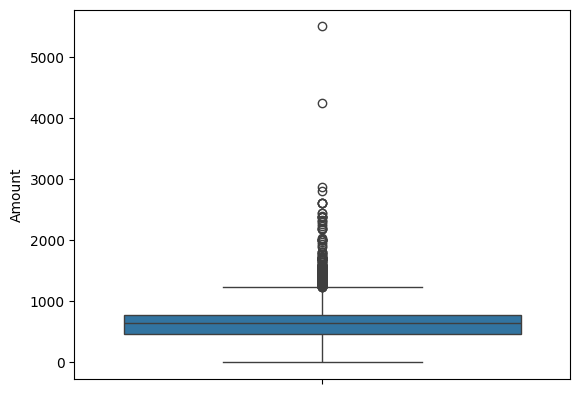

In [25]:
sns.boxplot(df['Amount'])
plt.show()

# **CHECKING FOR DUPLICATES**

In [26]:
df.duplicated().sum()

50

There are 50 duplicates so we have to drop the duplicates

In [27]:
df = df.drop_duplicates()

In [28]:
df.shape

(39200, 19)

In [29]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

# **EXPLORATORY DATA ANALYSIS**

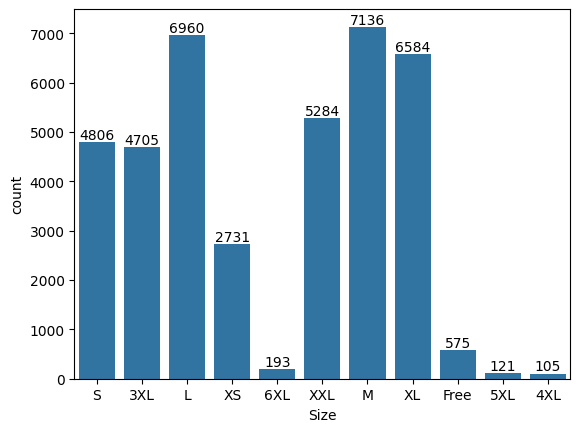

In [30]:
ax=sns.countplot(x='Size' ,data=df)

for bars in ax.containers:
    ax.bar_label(bars)

Note: From above Graph you can see that most of the people buys M-Size


In [31]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)


,Size,Qty
6,M,5897
5,L,5789
8,XL,5475
10,XXL,4457
0,3XL,3970
7,S,3891
9,XS,2183
4,Free,467
3,6XL,170
2,5XL,104


<Axes: xlabel='Size', ylabel='Qty'>

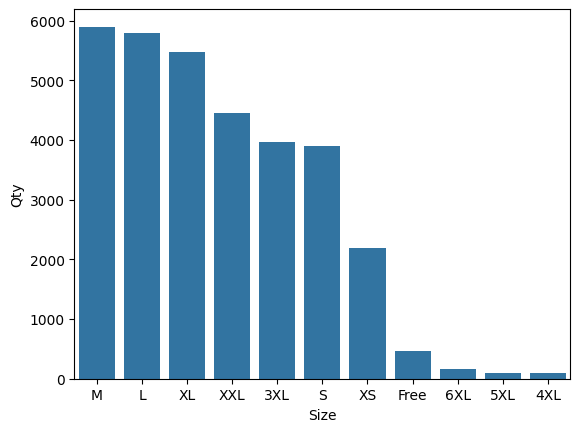

In [32]:
S_Qty=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

sns.barplot(x='Size',y='Qty', data=S_Qty)

Note: From above Graph you can see that most of the Qty buys M-Size in the sales

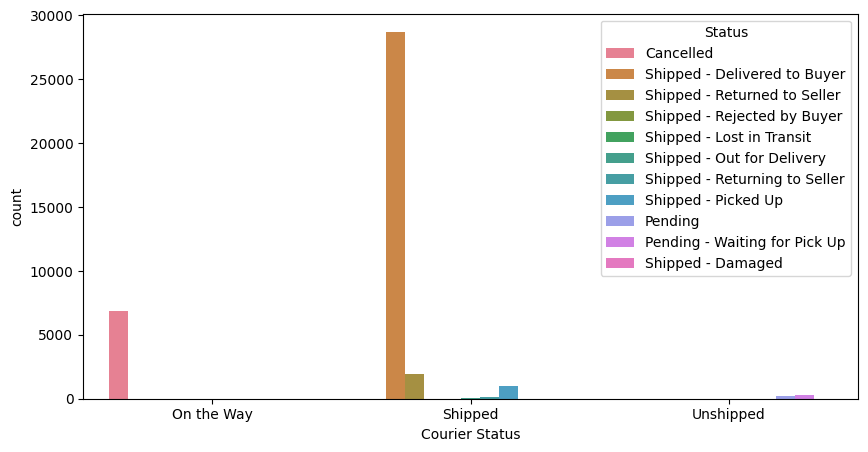

In [33]:
plt.figure(figsize=(10,5))

ax=sns.countplot(data=df, x='Courier Status',hue= 'Status')

plt.show()


Note: From above Graph the majority of the orders are shipped through the courier.


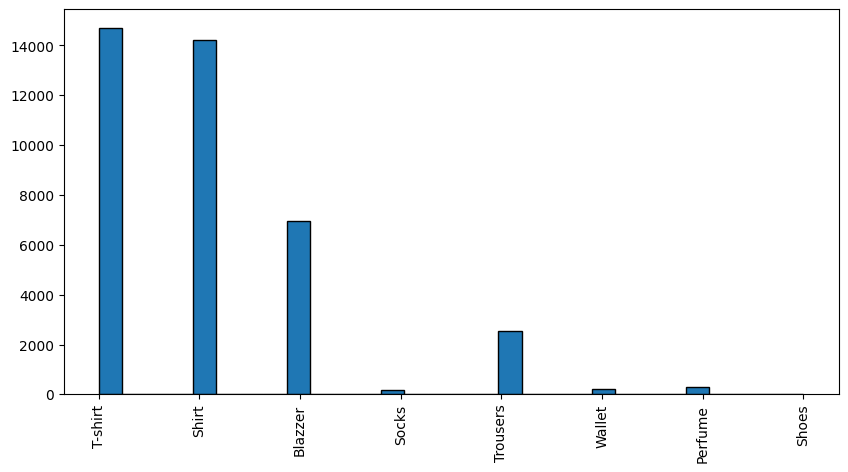

In [35]:
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize=(10, 5))
plt.hist(column_data, bins=30, edgecolor='Black')
plt.xticks(rotation=90)
plt.show()

Note: From above Graph you can see that most of the buyers are T-shirt

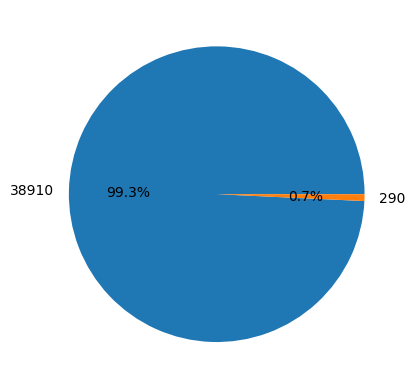

In [36]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

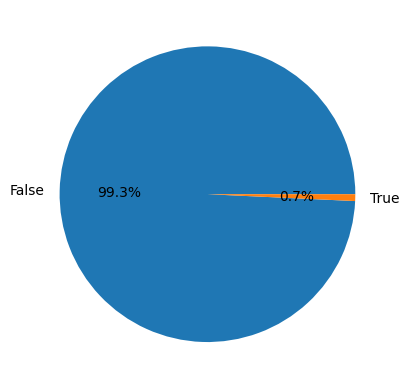

In [37]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

Note : From above chart we can see that maximum i.e. 99.3% of buyers are retailers and 0.7% are B2B buyers


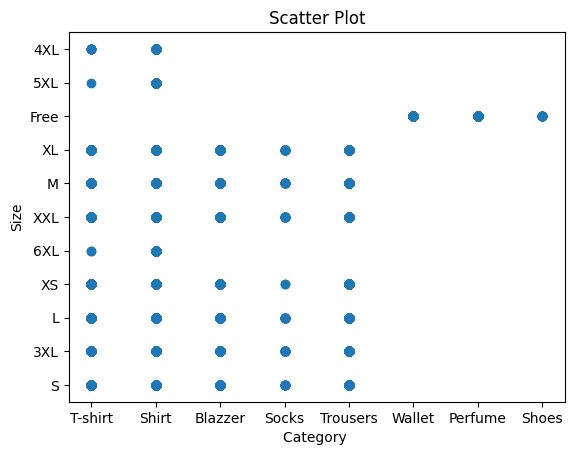

In [39]:
# Prepare data for scatter plot
x_data = df['Category']
y_data = df['Size']

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category ')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()

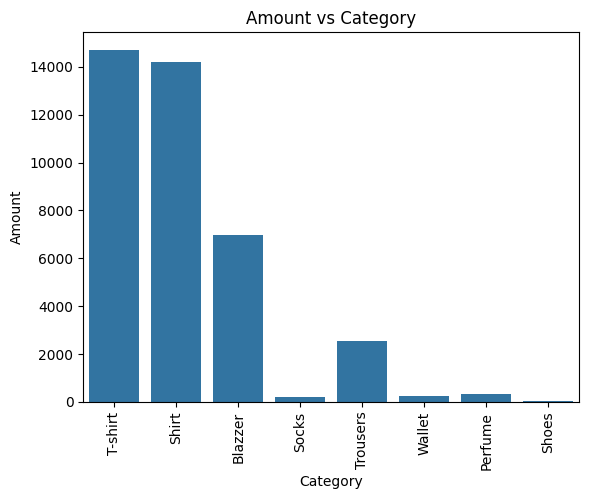

In [46]:
sns.countplot(data = df, x = 'Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Amount vs Category')
plt.xticks(rotation=90)
plt.show()

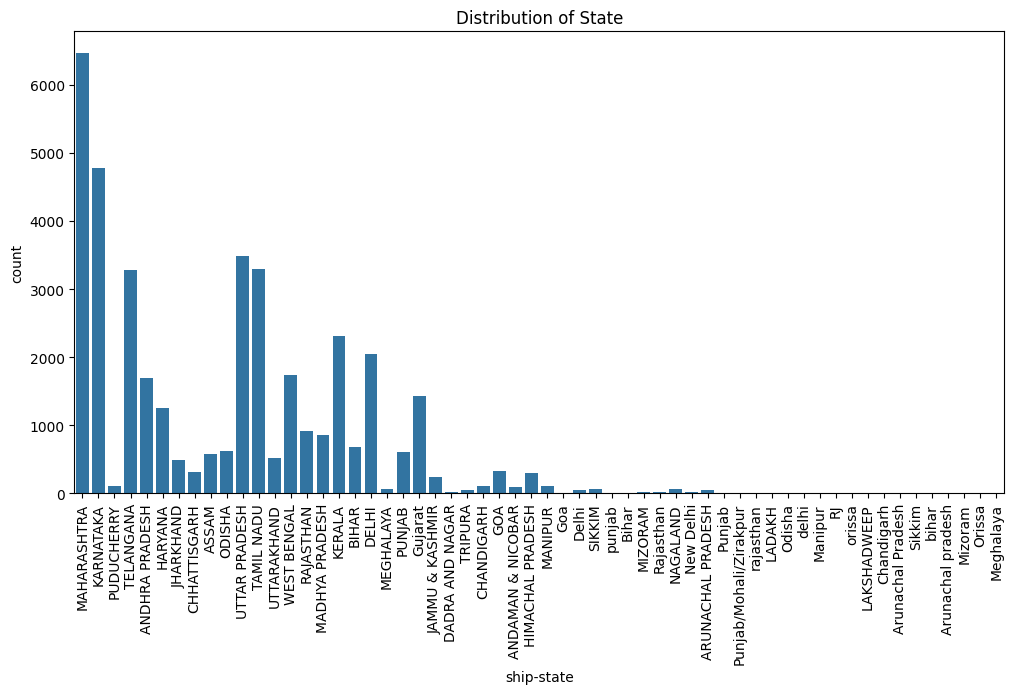

In [40]:
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

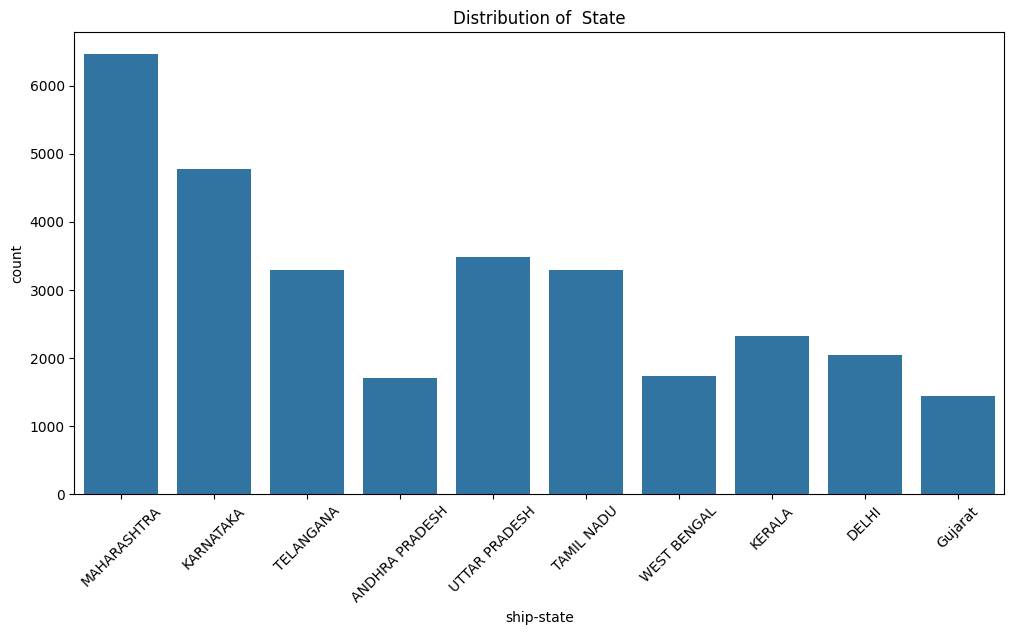

In [41]:
# top_10_States
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()


Note: From above Graph you can see that most of the buyers are Maharashtra state

# **Conclusion**
The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.
